# INTRODUCTION


In [ ]:
from IPython.display import Image
Image(url= "image/theatres.jpg", width=400, height=400)

**WHAT WAS THE FIRST MOVIE EVER MADE?**

If you love films (aka Movies), you would probably wonder what was the first movie that was made. This takes us back to the 18th Century. 
In the late 1880's various people embarked on an experimental journey to put a photograph into motion, they blended a group of photographs together to form what was then called "*a motion picture*". This *motion picture* in those days was called a film, that was the birth of film (AKA a movie). The likes of "**The horse in motion (in 1878)**" which only lasted for 1 second, followed by **Roundhay Garden scene (in 1885)** which was 2.11 seconds long, **Arrival of the Train(in 1895)** Just so you get the idea.

- Now, according to IMDB, since 1900 there's been an approximately 2,577 movies release each year, the lowest incline was in 1945 with   1,038. 
- In the year 1964 the yearly tally was back up at 2,509 and then there has never been any year with a lower number that this since.
- In the past 16 years, the movie production doubled the number of movies produced each year continuously moving from 4,584 in the year 2005, to 9,387 in the year 2015. 

## PROBLEM STATEMENT

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA has set up a challenge to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

## Installing packages and Import libraries

In [1]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from surprise.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


from sklearn.neighbors import NearestNeighbors

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

## Reading in data

In [2]:
#importing the datasets 
df_train = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/train.csv')
df_test = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/test.csv')
df_tags = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/tags.csv')
df_movies = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/movies.csv')
df_links = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/links.csv')
df_imdb= pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/imdb_data.csv')
df_genome_scores = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/genome_scores.csv')
df_genome_tags = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/genome_tags.csv')

**UNDERSTANDING THE DATASET**

**Features**

* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **MovieId:** The ID of the move.
* **UserId:** The ID of the user.
* **imdb_id:** The IMDB ID of the movie.
* **plot_keywords:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **release_date:** Theatrical Release Date of the mo
* **runtime:** The runtime of the movie in minutes.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **director:** The names of the person(s) who directed the movie
* **title_cast:** The list of actors in the movie
* **Genome_score:**
* **genome.tag:**
* **Relevance:**
* **tagId:** The Id column for each tag in the table
* **tag:** The label of category to which the movie belongs to
* **timestamp:** The digital date and time for when the data was recorded

In [9]:
#How many records do we have of each table
print('The dataset contains: ', len(df_genome_scores), ' ratings of ', len(df_movies), ' movies.')

The dataset contains:  15584448  ratings of  62423  movies.


### DATA WRANGLING

This data was originally obtained as a CSV files is already at a fromart that could be loaded into a Pandas DataFrame effortlessly. In other words, the dataset we have in our hands is already relatively clean. We will however attempt at learning more about our features and performing appropriate wrangling steps to arrive at a form that is more suitable for analysis.

In [10]:
pd.set_option("display.max_colwidth", -1)#this display the full width of the columns

In [11]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [8]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [11]:
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [12]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [13]:
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [14]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [15]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [16]:
final_dataset = df_genome_scores.pivot(index='movieId',columns='tagId',values='relevance')
final_dataset.head()

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [17]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


Merging the Data

In [18]:
movie_desc = df_train.merge(df_movies, on = 'movieId', how = 'left' )
movie_desc.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller


In [44]:
movie_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 534.1+ MB


**Grouping the numerical columns**
- This will help filtering the numerical column and reduce the volume of the dataset
- The merged numerical column data frame that is to created will be used to create summary statistics and to check correlation and relationships amongs our features

In [12]:
train_df= df_train.drop(['userId','timestamp'], axis=1)
genome_scores_df = df_genome_scores.drop('tagId', axis = 1)
imdb_data_df = df_imdb.drop(['title_cast','director','plot_keywords'],axis=1)

In [13]:
train_genome = train_df.merge(imdb_data_df, on = 'movieId')

In [14]:
#Checking for nulls 
print(train_genome.isnull().sum())

movieId    0      
rating     0      
runtime    2653058
budget     3152276
dtype: int64


In [15]:
df = train_genome[train_genome['budget'].notna()]
merged_df= df[df['runtime'].notna()]

In [16]:
print(merged_df.isnull().sum())

movieId    0
rating     0
runtime    0
budget     0
dtype: int64


In [17]:
genome_scores_df.shape

(15584448, 2)

In [18]:
sample_genome_scores = genome_scores_df.sample(n=10000)
merged_df_sample = merged_df.sample(n= 10000)

This is a ramdom sample of 10 000 observations from the data for data visualization, since the full dataset takes quite longer amount of time to complete the merge and it shall be used only for data visualization.

In [ ]:
numeric_col = sample_genome_scores.merge(merged_df_sample, on = 'movieId')

In [ ]:
numeric_col.head()

**Summary of Data wrangling**

- All the tables has been checked for null values and the above codes proves that there are no primary nulls (nulls from the original data).
- All the columns have been checked for correct column data types and proper storage of the data
- All the tables have friendly Primary keys and foreign keys which are necesary for any merge and/or table Joins


### EXPLORATORY DATA ANALYSIS

**Ratings per Group**

In [14]:
Average_ratings = pd.DataFrame(movie_desc.groupby('title')['rating'].mean().sort_values(ascending=False))
Average_ratings.head(10)

,rating
title,
Which Way Home (2009),5.0
Kaakha Kaakha (2003),5.0
Not Quite Human II (1989),5.0
Selling Isobel (2018),5.0
Sehar (2005),5.0
The Enchanted Sedan Chair (1905),5.0
K.G.F: Chapter 1 (2018),5.0
Hard Cash (2002),5.0
Everyone's Going to Die (2013),5.0


In [15]:
Average_ratings['Total_Ratings'] = pd.DataFrame(movie_desc.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total_Ratings
title,,
Which Way Home (2009),5.0,1
Kaakha Kaakha (2003),5.0,1
Not Quite Human II (1989),5.0,1
Selling Isobel (2018),5.0,1
Sehar (2005),5.0,1
The Enchanted Sedan Chair (1905),5.0,1
K.G.F: Chapter 1 (2018),5.0,1
Hard Cash (2002),5.0,1
Everyone's Going to Die (2013),5.0,1


In [63]:
usergenome_scoresAggr = df_genome_scores.groupby(['tagId']).agg({'relevance': [np.size, np.mean]})
usergenome_scoresAggr.reset_index(inplace=True)  # To reset multilevel (pivot-like) index
# usergenome_scoresAggr.head()

In [64]:
usergenome_scoresAggr['relevance'].describe()

,size,mean
count,1128.0,1128.000000
mean,13816.0,0.116368
std,0.0,0.091890
min,13816.0,0.004099
25%,13816.0,0.048828
50%,13816.0,0.088308
75%,13816.0,0.156003
max,13816.0,0.724424


In [66]:
moviegenome_scoresAggr = df_genome_scores.groupby(['movieId']).agg({'relevance': [np.size, np.mean]})
moviegenome_scoresAggr.reset_index(inplace=True)
# moviegenome_scoresAggr.head()

In [67]:
moviegenome_scoresAggr['relevance'].describe()

,size,mean
count,13816.0,13816.000000
mean,1128.0,0.116368
std,0.0,0.028656
min,1128.0,0.043554
25%,1128.0,0.095679
50%,1128.0,0.111478
75%,1128.0,0.132666
max,1128.0,0.337627


In [19]:
df_train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5    880516 
2.0    656821 
2.5    505578 
1.0    311213 
1.5    159731 
0.5    157571 
Name: rating, dtype: int64

In [20]:
df_movies['movieId']= df_movies['movieId'].astype(int)
df_genome_scores['movieId']=df_genome_scores['movieId'].astype(int)
df=df_movies.merge(df_genome_scores,on='movieId')
df.head()

,movieId,title,genres,tagId,relevance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0.02875
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,0.02375
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,0.06250
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,0.07575
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.14075


In [21]:
df=df.drop("tagId",axis=1)

In [22]:
#grouping data by title and count of ratings
genome_scores_count=df.groupby(['title'], as_index = False)[['relevance']].count()
genome_scores_count['genome_scores_count']=genome_scores_count['relevance']
genome_scores_count=genome_scores_count.drop("relevance", axis=1)
genome_scores_count.head()

,title,genome_scores_count
0,"""Great Performances"" Cats (1998)",1128
1,$5 a Day (2008),1128
2,$9.99 (2008),1128
3,'71 (2014),1128
4,'Hellboy': The Seeds of Creation (2004),1128


In [26]:
genome_scores_count.describe()

,genome_scores_count
count,13813.000000
mean,1128.244987
std,16.622421
min,1128.000000
25%,1128.000000
50%,1128.000000
75%,1128.000000
max,2256.000000


In [23]:
final_df=pd.merge(df,genome_scores_count,on='title')
final_df.head()

,movieId,title,genres,relevance,genome_scores_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.02875,1128
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.02375,1128
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.06250,1128
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.07575,1128
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.14075,1128


Final DataFrame

In [24]:
final_df_=final_df.groupby(['movieId','title','genres','genome_scores_count'], as_index = False)[['relevance']].mean()
final_df_['genome_scores_mean']=final_df_['relevance']
final_df_=final_df_.drop("relevance",axis=1)
final_df_.head()

,movieId,title,genres,genome_scores_count,genome_scores_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1128,0.163382
1,2,Jumanji (1995),Adventure|Children|Fantasy,1128,0.122205
2,3,Grumpier Old Men (1995),Comedy|Romance,1128,0.092110
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1128,0.087318
4,5,Father of the Bride Part II (1995),Comedy,1128,0.093966


In [25]:
final_df_.shape

(13816, 5)

In [26]:
a=final_df_['genome_scores_mean'].mean()
a

0.11636786379921875

In [27]:
b=final_df_['genome_scores_count'].quantile(0.85)
b

1128.0

In [28]:
final_df_.shape

(13816, 5)

In [29]:
c_movies=final_df_.copy().loc[final_df_['genome_scores_count'] >= b]
c_movies.shape

(13816, 5)

In [30]:
def weighted_rating(x, b=b, a=a):
    v = x['genome_scores_count']
    R = x['genome_scores_mean']
    # Calculation based on the IMDB formula
    return (v/(v+b) * R) + (b/(b+v) * a)

In [31]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
c_movies['score'] = c_movies.apply(weighted_rating, axis=1)

In [32]:
#Sort movies based on score calculated above
c_movies = c_movies.sort_values('score', ascending=False)

#Print the top 15 movies
c_movies[['title', 'genome_scores_count', 'genome_scores_mean', 'score']].head(15)

,title,genome_scores_count,genome_scores_mean,score
9673,Passchendaele (2008),1128,0.337627,0.226997
10009,Welcome to Dongmakgol (2005),1128,0.308385,0.212376
11376,"Band Called Death, A (2012)",1128,0.281792,0.199080
12154,Drunk Stoned Brilliant Dead: The Story of the National Lampoon (2015),1128,0.281420,0.198894
5322,"Whistle Blower, The (1986)",1128,0.276406,0.196387
7374,Death Rides a Horse (Da uomo a uomo) (1967),1128,0.268978,0.192673
10414,No Mercy (Yongseoneun Eupda) (2010),1128,0.258476,0.187422
11101,Doomsday Book (2012),1128,0.254818,0.185593
13742,The Farewell (2019),1128,0.254529,0.185448
8740,Triad Election (Election 2) (Hak se wui yi wo wai kwai) (2006),1128,0.250000,0.183184


In [33]:
genres=[]
for genre in df_movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in df_movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

**DATA VISUALIZATIONS**

In [57]:
import re

In [59]:
def getYear(title):
    result = re.search(r'\(\d{4}\)', title)
    if result:
        found = result.group(0).strip('(').strip(')')
    else: 
        found = 0
    return int(found)
    
df_movies['year'] = df_movies.apply(lambda x: getYear(x['title']), axis=1)
# movies.head(10)

In [61]:
genresList = [
  "Action",
  "Adventure",
  "Animation",
  "Children",
  "Comedy",
  "Crime",
  "Documentary",
  "Drama",
  "Fantasy",
  "Film-Noir",
  "Horror",
  "Musical",
  "Mystery",
  "Romance",
  "Sci-Fi",
  "Thriller",
  "War",
  "Western",
    "(no genres listed)"
]

def setGenresMatrix(genres):
    movieGenresMatrix = []
    movieGenresList = genres.split('|')
    for x in genresList:
        if (x in movieGenresList):
            movieGenresMatrix.append(1)
        else:
            movieGenresMatrix.append(0) 
    return movieGenresMatrix
    
df_movies['genresMatrix'] = df_movies.apply(lambda x: np.array(list(setGenresMatrix(x['genres']))), axis=1)

df_movies.head(5)

,movieId,title,genres,year,genresMatrix
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
4,5,Father of the Bride Part II (1995),Comedy,1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


**Set rating categories**

- Check the distribution of ratings per movie

In [68]:
moviegenome_scoresAggr['relevance'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])

,size,mean
count,13816.0,13816.000000
mean,1128.0,0.116368
std,0.0,0.028656
min,1128.0,0.043554
10%,1128.0,0.083982
20%,1128.0,0.092157
30%,1128.0,0.098840
40%,1128.0,0.105041
50%,1128.0,0.111478
60%,1128.0,0.118835


In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [70]:
from wordcloud import WordCloud

In [71]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

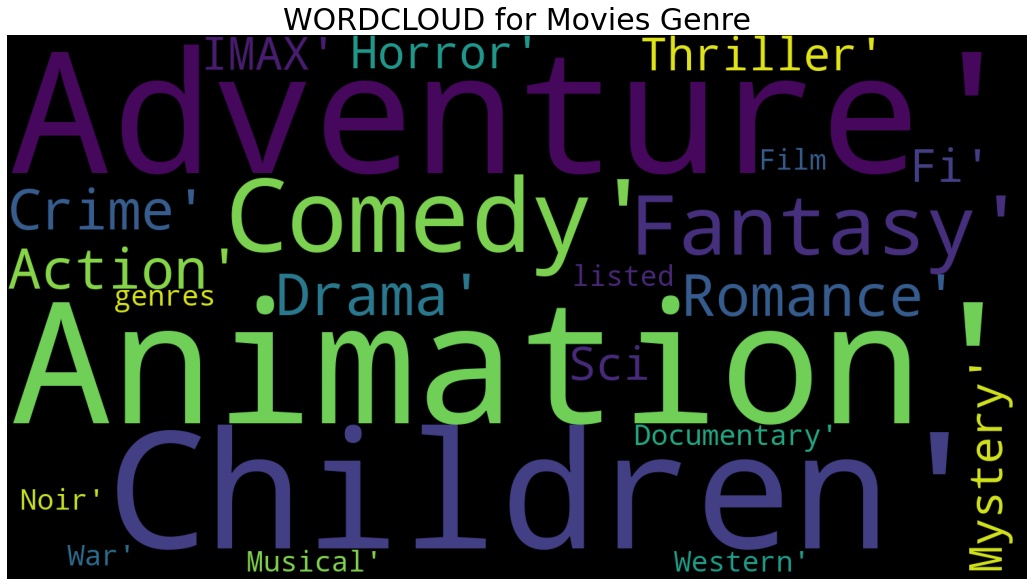

In [72]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

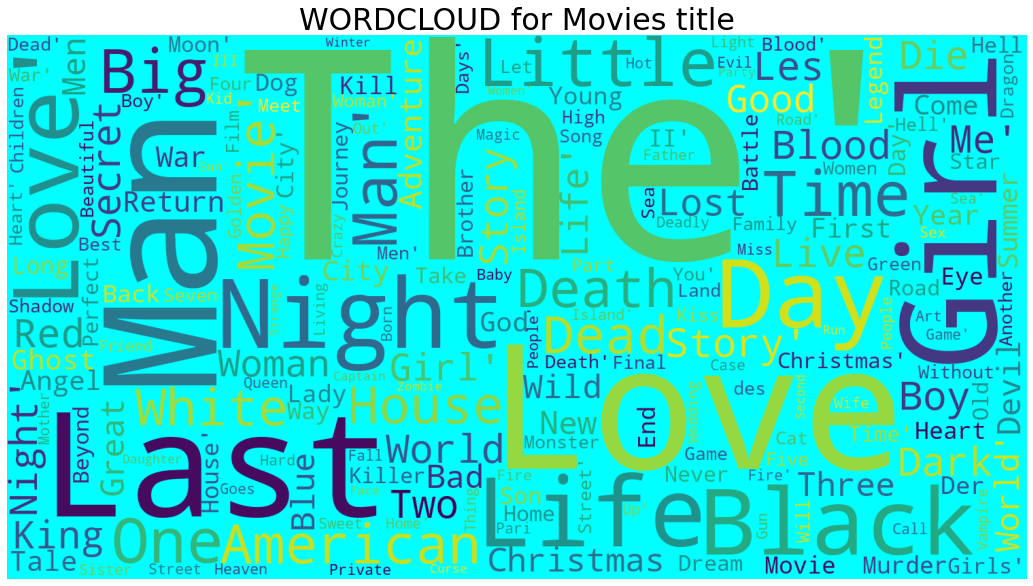

In [73]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

<AxesSubplot:>

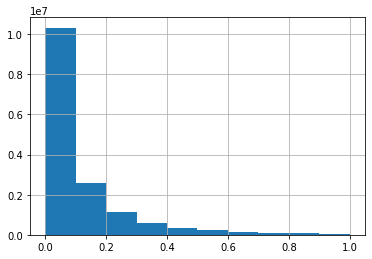

In [43]:
df_genome_scores['relevance'].hist()

<AxesSubplot:>

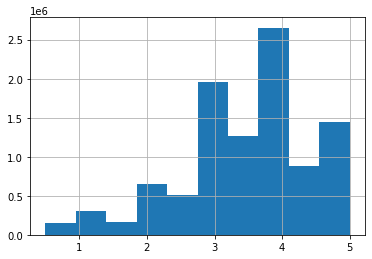

In [49]:
df_train['rating'].hist(bins = 10)

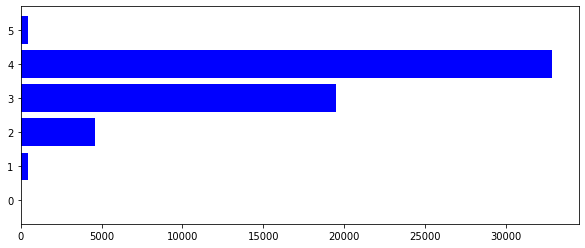

In [50]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(Average_ratings['rating'].round(),Average_ratings['Total_Ratings'],color='b')
plt.show()

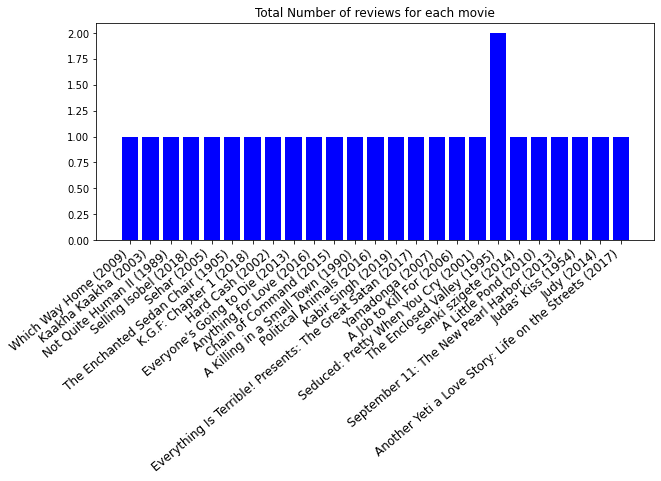

In [51]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(Average_ratings.head(25).index,Average_ratings['Total_Ratings'].head(25),color='b')
ax.set_xticklabels(Average_ratings.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

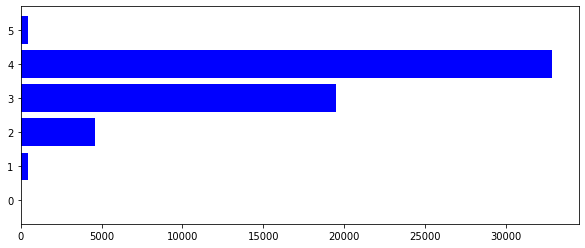

In [52]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(Average_ratings['rating'].round(),Average_ratings['Total_Ratings'],color='b')
plt.show()

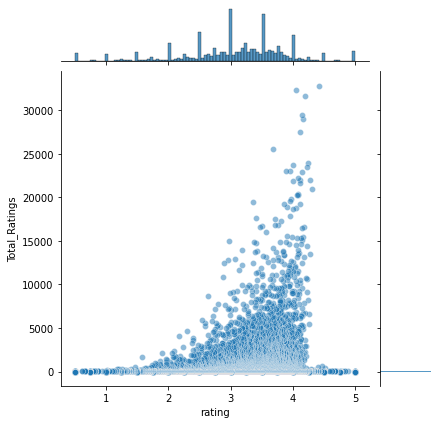

In [53]:
sns.jointplot(x='rating',y='Total_Ratings',data=Average_ratings,alpha=0.5)

**Correlation Heatmap**

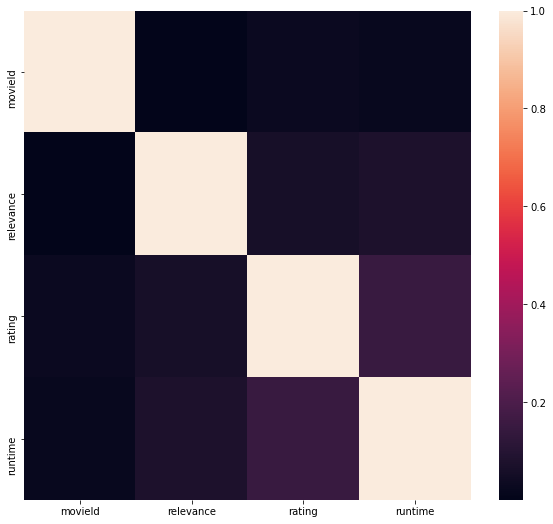

In [44]:
#creating a correlation heat map
corr = numeric_col.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corr)

**Satter plots**

Text(0.5, 1.0, 'Movie budget vs relevance')

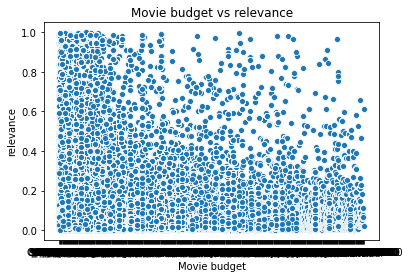

In [45]:
#plotting scatter plot
sns.scatterplot(x='budget',y='relevance',data= numeric_col)
plt.xlabel('Movie budget')
plt.ylabel('relevance')
plt.title('Movie budget vs relevance')

Text(0.5, 1.0, 'rating vs relevance')

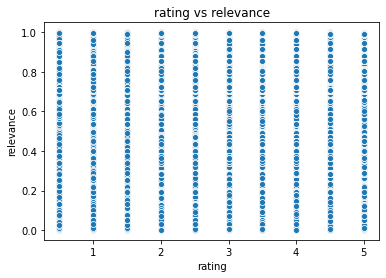

In [46]:
#plotting scatter plot
sns.scatterplot(x='rating',y='relevance',data= numeric_col)
plt.xlabel('rating')
plt.ylabel('relevance')
plt.title('rating vs relevance')

@@@@@@@@@@@@@ **END OF AE1 TEAM GROUP WORK** @@@@@@@@@@@@@@@

### DATA PREPROCESSING

### MODEL BUILDING AND TRAINING

**MODEL BASED COLLABORATIVE FILTERING**

In this section we will focus on building a collaborative filtering recomendation system that uses machine learnin models to predict the ratings a user would assign to a movie.

The suprise package has been desinged for making recomendations using collaborative filtering and has a variety of built-in models.

Since our original training data contains over 10 million rows, we will only train models on a subset of this. We will then choose the best performing model to be trained on the entire dataset. We subset our data by taking only those movies that have been reviewed over 500 times and only the users who have watched over 500 movies.

In [3]:
min_movie_ratings = 500
filter_movies = df_train['movieId'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 500
filter_users = df_train['userId'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df_train[(df_train['movieId'].isin(filter_movies)) & (df_train['userId'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df_train.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(10000038, 4)
The new data frame shape:	(750263, 4)


In [4]:
len(df_new)

750263

### Data Prep

In [5]:
from surprise import Reader, Dataset
reader = Reader(rating_scale=(0.5, 5.0))

# Comparing base models

In [6]:
svd=SVD()

In [7]:
from surprise.model_selection import cross_validate

In [8]:
def Compare_models(data,models,subset):
    ratings = data[['userId','movieId','rating']][:subset]
    data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
    benchmark = []
    # Iterate over all algorithms
    for algorithm in models:
        # Perform cross validation
        results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)

        # Get results & append algorithm name
        tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
        benchmark.append(tmp)   
    return pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [9]:
models=[SVD(), SVDpp(), SlopeOne(), NMF(), KNNBasic(), KNNWithMeans(), CoClustering()]
compare_10K=Compare_models(df_new,models,10000)
compare_10K

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.966296,2.970225,0.220211
SVD,0.971377,1.577623,0.308993
KNNBasic,1.037326,0.157254,0.135253
KNNWithMeans,1.077935,0.241521,0.089987
SlopeOne,1.087088,0.474452,0.050261
NMF,1.170227,1.550683,0.059578
CoClustering,1.180192,1.623701,0.040175


In [10]:
models=[SVD(), SVDpp(), SlopeOne(), NMF(), KNNBasic(), KNNWithMeans(), CoClustering()]
compare_20K=Compare_models(df_new,models,20000)
compare_20K

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.927778,7.329234,0.380635
SVD,0.939857,2.014569,0.137336
KNNWithMeans,1.035579,0.221336,0.286657
KNNBasic,1.073730,0.162182,0.213292
SlopeOne,1.074251,0.771204,0.143350
NMF,1.078890,2.483930,0.102656
CoClustering,1.084276,2.061368,0.065344


In [11]:
models=[SVD(), SVDpp(), SlopeOne(), NMF(), KNNBasic(), KNNWithMeans(), CoClustering()]
compare_50K=Compare_models(df_new,models,50000)
compare_50K

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.879109,31.627798,1.546960
SVD,0.884556,5.268029,0.386677
NMF,0.975771,6.217670,0.512003
CoClustering,0.976053,3.234687,0.241332
KNNWithMeans,1.020500,0.421332,1.197403
KNNBasic,1.123238,0.293319,0.956069
SlopeOne,1.162840,0.822218,0.823536


As we can see, the SVD and SVDpp models perform the best when minimizing the rmse. These models have really high fit times which could cause problems when attempting to run on the entire dataframe.

In [12]:
(pd.DataFrame(compare_50K)['fit_time']+pd.DataFrame(compare_50K)['test_time'])*pd.DataFrame(compare_50K)['test_rmse']

Algorithm
SVDpp           29.164242
SVD              5.001904
NMF              6.566620
CoClustering     3.392778
KNNWithMeans     1.651920
KNNBasic         1.403360
SlopeOne         1.913749
dtype: float64

The KNN based approaches have the best performance when taking into account the time and the rmse, while the SlopeOne method also performs well using this metric. The SVD model does not do well on this metric, but the fit time is considerably lower than SVDpp while also having the best RMSE out of the rest of the models.

In [13]:
# Top 4 model
models=[SVD(), SlopeOne(),KNNBasic(),KNNWithMeans()]
compare_top=Compare_models(df_new,models,-1)
compare_top

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.791423,80.994020,7.895746
KNNWithMeans,0.810057,17.436443,121.844004
SlopeOne,0.818641,35.426652,177.302378
KNNBasic,0.843721,18.665912,135.964088


In [14]:
(pd.DataFrame(compare_top)['fit_time']+pd.DataFrame(compare_top)['test_time'])*pd.DataFrame(compare_top)['test_rmse']

Algorithm
SVD              70.349440
KNNWithMeans    112.825144
SlopeOne        174.148692
KNNBasic        130.464591
dtype: float64

When using over 750000 rows it seems that the SVD model has the edge in both rmse and total time.

# Making submission

In [ ]:
def Make_prediction(model,data,test):
    data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader).build_full_trainset()
    model.fit(data)
    prediction=[]
    for _,row in test.iterrows():
        prediction.append(model.predict(row[0],row[1]).est)
    Ident=[]
    for _,row in test.iterrows():
        Ident.append(str(row[0])+'_'+str(row[1])) 
    submission=pd.DataFrame([])
    submission['Id']=Ident
    submission['rating']=prediction
    return model,submission

In [ ]:
svd=SVD()
model,submission=Make_prediction(svd,df_train,df_test)

In [ ]:
submission

In [ ]:
#submission.to_csv('SVD.csv', index = False)